# 13 Display Generic Gate U as Matrix using Qiskit-Notebook:

* Remember in the Notebook - [03 Executing random quantum circuit on Aer](03%20Executing%20random%20quantum%20circuit%20on%20Aer.ipynb), we have tried to create a random rotation gate but the `qiskit visualization` does not supports the many cases.
* In such case, if we want to print the gate operator U for n-qubits, e.g. say for 3 qubits, we can use the `from qiskit_textbook.tools.array_to_latex()` and pass on the `unitary_simulator` output object.



### Random circuit generator: 

In [15]:
import random
import math
import cmath

def get_random_qubit_state(debug=False):
    
    # Range of a polar angle is 0 to Pi radians - both inclusive viz., (0,pi)
    polar_angle = random.uniform(0, math.pi)
    
    if(debug):
        print("Polar Angle (theta): ",polar_angle)
    
    # Range of azimulath angle is 0 to 2*Pi radians excluding 2*pi viz., [0,2pi)
    azimuthal_angle = random.uniform(0, 2*math.pi)
    
    if(debug):
        print("Azimuthal Angle (phi): ",azimuthal_angle)
    
    # Generate amplitudes 
    alpha = math.cos(polar_angle/2)
    beta = cmath.exp(azimuthal_angle*1j) * (math.sin(polar_angle/2))  # e^i*theta = cos(theat) + i . sin(theta)
    
    # Validation: Unitarity: sum of squares of complex amplitude 
    test = math.pow(abs(alpha),2) + math.pow(abs(beta),2)
    if(debug):
        print("Unitary test: ",test)
    
    # alpha and beta are 2 complex number representing complex probabilities
    return([alpha,beta])

In [16]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, visualize_transition


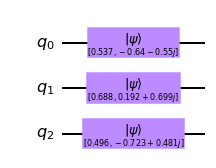

In [17]:
number_of_qubits = 3
random_initial_kets = [get_random_qubit_state() for i in range(number_of_qubits)] 
qubit_index = [i for i in range(number_of_qubits)]

qc = QuantumCircuit(number_of_qubits)

#random.shuffle(qubit_index)
#print(qubit_index)

for i in range(number_of_qubits):
    qc.initialize(random_initial_kets[i],qubit_index[i])

random.shuffle(qubit_index)
#print(qubit_index)
#qc.x(qubit_index[0])

#qc.draw()
qc.draw('mpl')


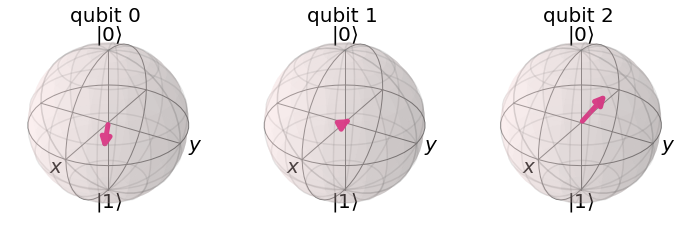

In [18]:
backend = Aer.get_backend("unitary_simulator")
out = execute(qc,backend).result().get_unitary()
plot_bloch_multivector(out)
# plot_histogram(execute(qc,backend).result().get_counts()) # QiskitError: 'No counts for experiment "0"'

In [19]:
from qiskit_textbook.tools import array_to_latex
array_to_latex(out, pretext="\\text{Unitary Vector = }")

<IPython.core.display.Math object>

### Simpler example: 

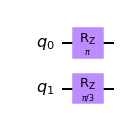

In [61]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, visualize_transition
import random 

number_of_qubits = 2 # Use between 2-4 Only. 

qc = QuantumCircuit(number_of_qubits)

# Bring all into superpostion: 
#for i in range(number_of_qubits):
#    qc.h(i)

# Run random rotate around z using R-phi gate
for i in range(number_of_qubits):
    p = random.choice([-6,-4,-3,-2,-1,1,2,3,4,6])
    # p = random.choice([1,2,3,4,6])
    phi_angle = math.pi / p
    qc.rz(phi_angle,i)

#qc.draw()
qc.draw('mpl')



In [62]:
backend = Aer.get_backend("unitary_simulator")
out = execute(qc,backend).result().get_unitary()
#plot_bloch_multivector(out)

from qiskit_textbook.tools import array_to_latex
array_to_latex(out, pretext="\\text{Unitary Operator U = }")


<IPython.core.display.Math object>

### Simulate this Uperator U on Qubits:

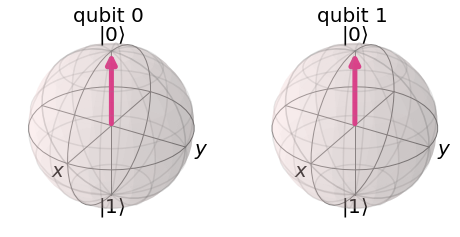

In [63]:

backend2 = Aer.get_backend("statevector_simulator")
out = execute(qc,backend2).result().get_statevector()
plot_bloch_multivector(out)

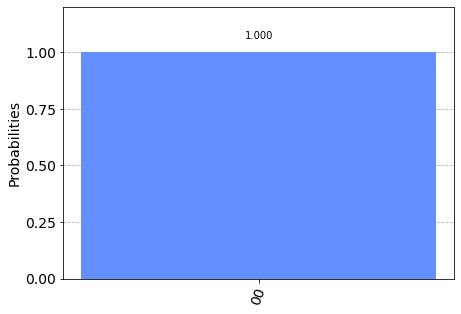

In [64]:
plot_histogram(execute(qc,backend2).result().get_counts())

## Exercise: 
1. Try to generate the Operator U for three qubits having qc.u(theat,phi,lmbda) on all
2. Calculate _manually_ by applying U on three quibts 
3. Verify the result by using `qiskit_textbook.tools.array_to_latex()`


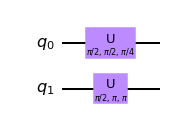

In [102]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram, visualize_transition
import random 

number_of_qubits = 2 # Use between 2-4 Only. 

qc = QuantumCircuit(number_of_qubits)
 

# Run random rotate around using Generic U gate
set_manual =  False #True # False
for i in range(number_of_qubits):
    p = random.choice([1,2,4]) # random.choice([-6,-4,-3,-2,-1,1,2,3,4,6])
    theta = math.pi / p
    
    p = random.choice([1,2,4]) # random.choice([-6,-4,-3,-2,-1,1,2,3,4,6])
    phi   = math.pi / p
    
    p = random.choice([1,2,4]) # random.choice([-6,-4,-3,-2,-1,1,2,3,4,6])
    lmbda   = math.pi / p
    
    if set_manual: 
        theta = 0 
        phi   = 0 
        lmbda = 0

    qc.u(theta, phi,lmbda,i)

#qc.draw()
qc.draw('mpl')

In [103]:
backend1 = Aer.get_backend("unitary_simulator")
out = execute(qc,backend1).result().get_unitary()
#plot_bloch_multivector(out)

from qiskit_textbook.tools import array_to_latex
array_to_latex(out, pretext="\\text{U = }")

<IPython.core.display.Math object>

### Manual Calculation:

1. Since we know that: 
$ (U_1 \vert q_0 \rangle) \otimes (U_2 \vert q_1 \rangle)   = ( U_1 \otimes U2 ) \ \vert q_0 q_1 \rangle $

Here $U_1, U2$ could be any single qubit gates (e.g. $I,X,Y,Z,S,T,H, R_{Z(\phi)}, U_3, U_2, U_1 \ etc$) and $ U = ( U_1 \otimes U2 )$ is the Unitary matrix calculated above. 


2. Hence Calculate product $\vert q_0 q_1 \rangle$. This is called as [Tensor product of ket vectors](https://physics.stackexchange.com/a/417681/330760). 


3. Assume, qubits are initilized as zeros then this will be $\vert q_0 q_1 \rangle = \vert 0 \rangle \otimes \vert 0 \rangle = \vert 00 \rangle  $. As per $\S Thomas Wong 4.2.2$ this will be :  

$$ \vert 00 \rangle = 
\begin{bmatrix}
1 \\
0 \\
0 \\
0 \\
\end{bmatrix}
$$


4. Finally Multiply $U$ with $\vert 00 \rangle$ go get $ U \vert 00 \rangle$ by simple matrix multiplication.
5. Tally your answer from below! 


In [105]:
backend2 = Aer.get_backend("statevector_simulator")
out = execute(qc,backend2).result().get_statevector()
#plot_bloch_multivector(out)

from qiskit_textbook.tools import array_to_latex
array_to_latex(out, pretext="\\text{U = }")

<IPython.core.display.Math object>